<a href="https://colab.research.google.com/github/saileepanchbhai/Advance-Machine-Learning-Lab/blob/main/TSA_2_Plot_ACF_and_PACF%2C_Generating_the_ARIMA_plot_and_TSA_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import pandas library
# Used for data manipulation and handling datasets (DataFrame operations)
import pandas as pd

# Import numpy library
# Used for numerical operations and working with arrays
import numpy as np

# Import matplotlib library
# Used for data visualization and plotting graphs (especially time series plots)
import matplotlib.pyplot as plt

# Import Augmented Dickey-Fuller test function
# Used to check whether a time series is stationary or not
from statsmodels.tsa.stattools import adfuller

In [23]:
# Import files module from Google Colab
# This is used to upload files from your local system into Colab environment
from google.colab import files

# Open file upload dialog box
# It allows the user to select and upload file(s) from their computer
uploaded = files.upload()

# Loop through the uploaded files
# 'uploaded' is a dictionary where:
#   key   = file name
#   value = file content (in bytes)
for fn in uploaded.keys():

    # Print the name and size of each uploaded file
    # len(uploaded[fn]) gives the size of the file in bytes
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn,
        length=len(uploaded[fn])
    ))

Saving AirPassengers.csv to AirPassengers (1).csv
User uploaded file "AirPassengers (1).csv" with length 1746 bytes


In [24]:
# Read the CSV file into a pandas DataFrame
# 'AirPassengers.csv' should be present in the current working directory
df = pd.read_csv('AirPassengers.csv')

# Display the first 5 rows of the dataset
# head() helps to quickly inspect the structure, column names, and sample data
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [25]:
# Convert the 'Month' column into datetime format
# This ensures the column is recognized as a proper date type (important for time series analysis)
df['Month'] = pd.to_datetime(df['Month'])

# Set the 'Month' column as the DataFrame index
# Time series data should have a datetime index for proper plotting and analysis
df.set_index('Month', inplace=True)

# Display the first 5 rows to verify changes
# Now 'Month' should appear as the index instead of a normal column
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


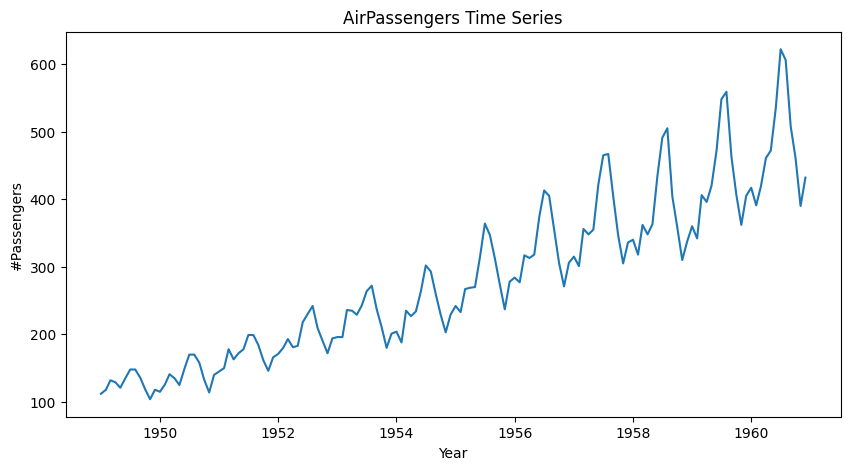

In [26]:
# Create a new figure with specified size (width=10 inches, height=5 inches)
# This improves readability of the time series plot
plt.figure(figsize=(10,5))

# Plot the '#Passengers' column against the datetime index (Month)
# Since 'Month' is set as index, it will automatically be used on X-axis
plt.plot(df['#Passengers'])

# Add title to the graph
plt.title("AirPassengers Time Series")

# Label the X-axis
plt.xlabel("Year")

# Label the Y-axis
plt.ylabel("#Passengers")

# Display the plot
plt.show()

In [27]:
# Apply Augmented Dickey-Fuller (ADF) test on the '#Passengers' column
# ADF test is used to check whether the time series is stationary or not
result = adfuller(df['#Passengers'])

# Print the ADF test statistic value
# More negative value → stronger evidence against the null hypothesis (non-stationary)
print("ADF Statistic:", result[0])

# Print the p-value
# If p-value < 0.05 → Reject null hypothesis → Series is stationary
# If p-value > 0.05 → Fail to reject null hypothesis → Series is non-stationary
print("p-value:", result[1])

# Print the critical values at different confidence levels (1%, 5%, 10%)
# Compare ADF statistic with these values to decide stationarity
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1% : -3.4816817173418295
   5% : -2.8840418343195267
   10% : -2.578770059171598


In [28]:
# Check the p-value from the ADF test result
# result[1] contains the p-value

if result[1] < 0.05:
    # If p-value is less than 0.05 (5% significance level)
    # We reject the null hypothesis (series has unit root)
    # Conclusion: The time series is stationary
    print("The series is Stationary")
else:
    # If p-value is greater than 0.05
    # We fail to reject the null hypothesis
    # Conclusion: The time series is non-stationary
    print("The series is NOT Stationary")

The series is NOT Stationary


In [29]:
# Apply first-order differencing to make the series stationary
# diff() calculates the difference between current and previous value (Y_t - Y_t-1)
# dropna() removes the first NaN value created after differencing
df_diff = df['#Passengers'].diff().dropna()

# Apply Augmented Dickey-Fuller (ADF) test on the differenced data
# This checks whether differencing made the series stationary
result_diff = adfuller(df_diff)

# Print results after differencing
print("After Differencing:")

# Print ADF statistic of differenced series
print("ADF Statistic:", result_diff[0])

# Print p-value of differenced series
# If p-value < 0.05 → Differenced series is stationary
print("p-value:", result_diff[1])

After Differencing:
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [30]:
# Import functions to plot ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
# These plots help identify the order of AR (p) and MA (q) terms in ARIMA modeling
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import ARIMA model from statsmodels
# ARIMA (AutoRegressive Integrated Moving Average) is used for forecasting time series data
# 'AR' term models the past values, 'I' term represents differencing to make series stationary,
# 'MA' term models the past forecast errors
from statsmodels.tsa.arima.model import ARIMA

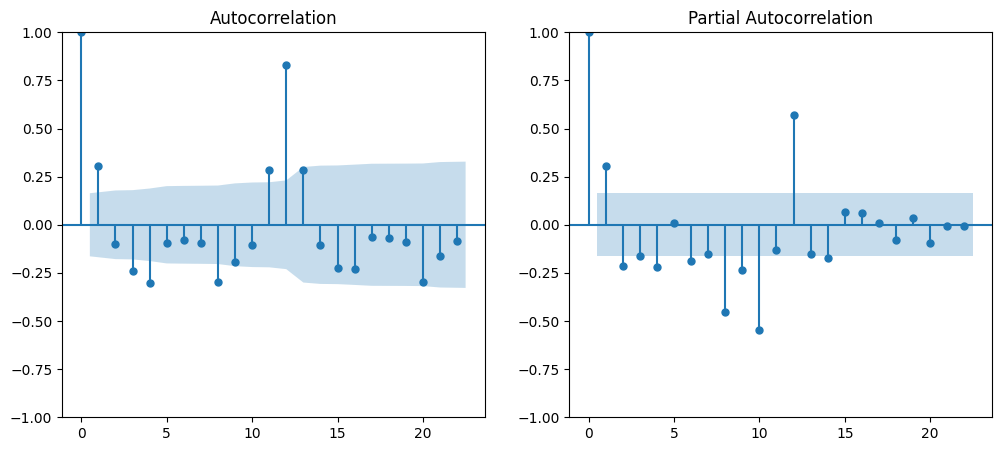

In [31]:
# Create a figure for ACF and PACF plots with a larger size for clarity
plt.figure(figsize=(12,5))

# Plot ACF (Autocorrelation Function) on the left subplot
# Helps identify the q parameter (MA order) for ARIMA
plt.subplot(1,2,1)
plot_acf(df_diff, ax=plt.gca())

# Plot PACF (Partial Autocorrelation Function) on the right subplot
# Helps identify the p parameter (AR order) for ARIMA
plt.subplot(1,2,2)
plot_pacf(df_diff, ax=plt.gca())

# Display both plots side by side
plt.show()

In [32]:
# Define the ARIMA model
# order=(p, d, q) → here:
#   p = 1 : AR (AutoRegressive) term
#   d = 1 : Differencing to make series stationary
#   q = 1 : MA (Moving Average) term
model = ARIMA(df['#Passengers'], order=(1,1,1))

# Fit the ARIMA model to the data
model_fit = model.fit()

# Print the summary of the fitted ARIMA model
# Provides coefficients, AIC/BIC values, and diagnostic statistics
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sat, 21 Feb 2026   AIC                           1394.683
Time:                        11:26:48   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


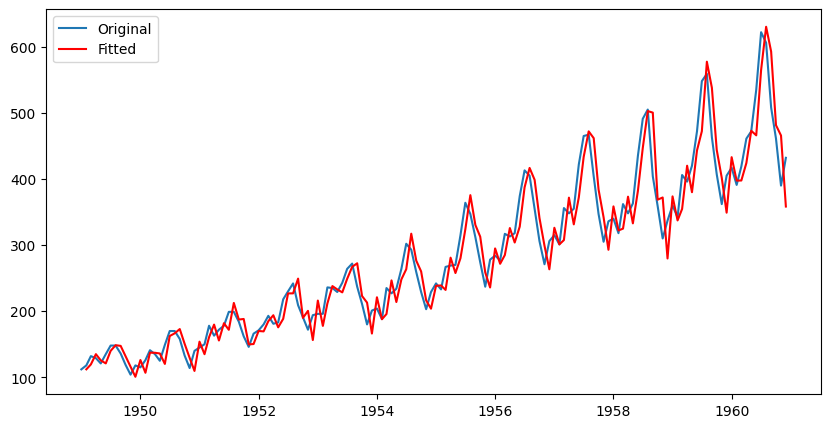

In [33]:
# Generate in-sample predictions from the fitted ARIMA model
# start=1 and end=len(df) define the prediction range
# typ='levels' ensures predictions are in the original scale (not differenced)
df['ARIMA_Fitted'] = model_fit.predict(start=1, end=len(df), typ='levels')

# Plot the original and fitted values for comparison
plt.figure(figsize=(10,5))

# Plot original time series
plt.plot(df['#Passengers'], label='Original')

# Plot ARIMA fitted values in red
plt.plot(df['ARIMA_Fitted'], color='red', label='Fitted')

# Add legend to differentiate original vs fitted
plt.legend()

# Display the plot
plt.show()

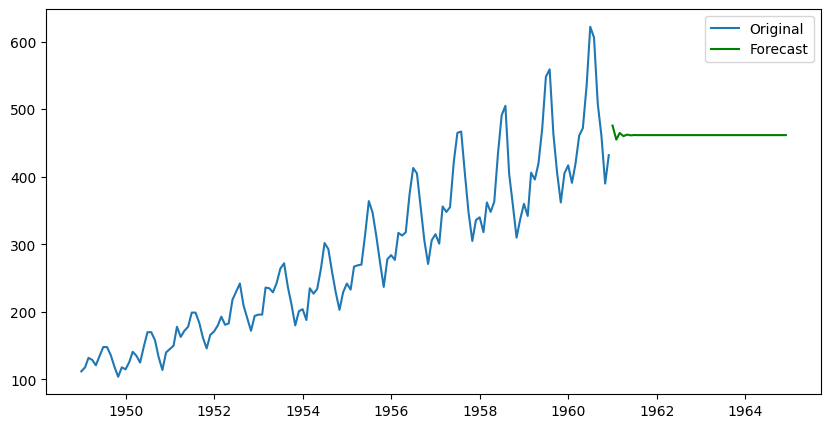

Forecasted Values:
1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
1962-01-01    461.668879
1962-02-01    461.666198
1962-03-01    461.667469
1962-04-01    461.666866
1962-05-01    461.667152
1962-06-01    461.667017
1962-07-01    461.667081
1962-08-01    461.667050
1962-09-01    461.667065
1962-10-01    461.667058
1962-11-01    461.667061
1962-12-01    461.667060
1963-01-01    461.667060
1963-02-01    461.667060
1963-03-01    461.667060
1963-04-01    461.667060
1963-05-01    461.667060
1963-06-01    461.667060
1963-07-01    461.667060
1963-08-01    461.667060
1963-09-01    461.667060
1963-10-01    461.667060
1963-11-01    461.667060
1963-12-01    461.667060
1964-01-01    461.667060
1964-02-01    461.667060
1964-03-01    461.667060
1964-0

In [34]:
# Forecast the next 48 time points (months) using the fitted ARIMA model
forecast = model_fit.forecast(steps=48)

# Plot original series and forecasted values
plt.figure(figsize=(10,5))

# Plot original time series
plt.plot(df['#Passengers'], label='Original')

# Plot forecasted values in green
plt.plot(forecast, color='green', label='Forecast')

# Add legend to differentiate original vs forecast
plt.legend()

# Display the plot
plt.show()

# Print the forecasted passenger values for the next 48 months
print("Forecasted Values:")
print(forecast)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


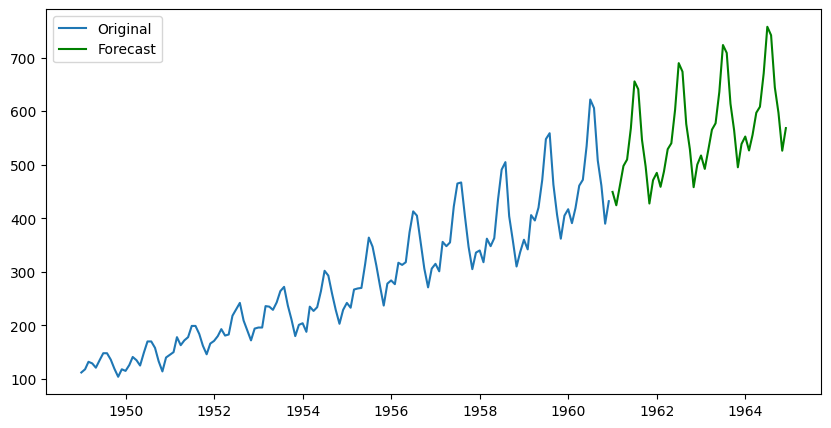

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Import SARIMAX if not already imported
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define a SARIMAX model for seasonal time series forecasting
# order=(p,d,q)       → Non-seasonal ARIMA components
# seasonal_order=(P,D,Q,s) → Seasonal components with seasonality s=12 (monthly data)
model = SARIMAX(df['#Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

# Fit the SARIMAX model to the data
model_fit = model.fit()

# Forecast the next 48 time points (months) using the fitted SARIMAX model
forecast = model_fit.forecast(steps=48)

# Plot original series and SARIMAX forecast
plt.figure(figsize=(10,5))

# Original time series
plt.plot(df['#Passengers'], label='Original')

# Forecasted values from SARIMAX
plt.plot(forecast, label='Forecast', color='green')

# Add legend to differentiate
plt.legend()

# Display the plot
plt.show()